[View in Colaboratory](https://colab.research.google.com/github/ZackAkil/learning-reinforcement-learning-/blob/master/Copy_of_Getting_stuff_done_with_ML.ipynb)

# Getting sh*t done with machine learning
Practical approach to solving problems with learning machine.

![alt text](https://media.giphy.com/media/Qc1GoESZuKCS4/giphy.gif)

**DISCLAIMER:** We are going to look at how you might go about solving problems in the wild, not nessasarily stuff that makes good achedemic papers #YOLOv3.

## Maybe useful guideline #1

*<h1 style="font-size"> "Know your environment" </h1>*

A lot of the issues you will face in data science tend to be becuase you either running the wrong version of a library, or python, or a library that dosn't exist.

Check what version of python your on by running:

```python
import sys
sys.version
```


In [0]:
# your code goes here. press the ▷ button to the left of the code to run the cell, 
# or 'ctrl + enter' to runn just this cell, or 'shift + enter' to run this cell and move focus to next cell



You can run bash/terminal commands by prefixing code with a ** ! **

pip is your favourite python package manager/installer

see what all of the libraries you have are by running:

```bash
! pip freeze
```

In [0]:
# your code goes here

 

# "*ModuleNotFoundError*" is  your friend

Let's make a venn diagram:

```python
from matplotlib_venn import venn2
venn2(subsets = (3, 2, 1))
```

In [0]:
# your code goes here



# DON'T PANIC

We can just install the package now:

```bash
!pip install matplotlib-venn
```

In [0]:
# your code goes here



Ok, now that the package is installed, you can try the venn code again:

```python
from matplotlib_venn import venn2
venn2(subsets = (3, 2, 1))
```

In [0]:
# your code goes here



# Now ML Tasks

# Do iris!

![alt text](https://cdn-images-1.medium.com/max/1600/1*1q79O5DCx_XNrAARXSFzpg.png)

In [0]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

In [0]:
iris = load_iris()

iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [0]:
X = iris['data']
y = iris['target']

# y = np.take(iris['target_names'], iris['target'])

We can both split and shuffle our data using sklearns [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Tree algorithms are nice to do quick work becuase they depend less on scaling the data

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
model.score(X_test, y_test)

1.0

In [0]:
model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

Use numpy [take](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.take.html) function to replace numbers with words from a list

In [0]:
import numpy as np

In [0]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
np.take(iris['target_names'], model.predict(X_test))

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa'], dtype='<U10')

# Save our model to use again later

In [0]:
from sklearn.externals import joblib

In [0]:
joblib.dump(model, 'model.joblib')

['model.joblib']

In [0]:
! ls

datalab  model.joblib


# Load our model

In [0]:
loaded_model = joblib.load('model.joblib')

In [0]:
loaded_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
loaded_model.predict([[1,2,3,4]])

array([2])

# How to build a cat classifier (or not)

sploiler alert, don't re-invent the wheel, when someone else has already invented a hovercraft

https://cloud.google.com/vision/

# Bonus, building Keras
Keras is a higher level API that wraps around populare deep learning frameworks like TensorFlow and Theano

In [0]:
import keras

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras import backend as K



Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



11493376/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))



In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



In [0]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 173s 3ms/step - loss: 0.2559 - acc: 0.9211 - val_loss: 0.0619 - val_acc: 0.9807
Epoch 2/12
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0876 - acc: 0.9739 - val_loss: 0.0386 - val_acc: 0.9868
Epoch 3/12
17024/60000 [=======>......................] - ETA: 1:57 - loss: 0.0634 - acc: 0.9803

KeyboardInterrupt: ignored

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Top resources IMO

Best balance of theory and practicle ML 
![alt text](https://covers.oreillystatic.com/images/0636920052289/cat.gif)

http://shop.oreilly.com/product/0636920052289.do




---


All of Andrew Ng's courses

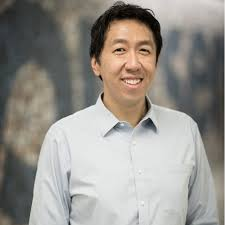

https://www.coursera.org/courses?query=machine%20learning%20andrew%20ng

Starting off with [original course](https://www.coursera.org/learn/machine-learning) that has you building different types of ML from scratch.

And then on to his [Deep Learning courses](https://www.coursera.org/specializations/deep-learning) which are more practicle using Tensorflow and Keras to explain DNN CNN RNN etc
